**Importing necessary libraries**

In [ ]:
import pandas as pd 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Create a Pandas DataFrame to read from a CSV file

In [ ]:
data = pd.read_csv("daily_weather.csv")
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [ ]:
# Let's look at the columns in the dataset 
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

### Data Cleaning 

We have to look for any null values and get rid of those values to make a clean data set

In [ ]:
data.isnull().any().any()

True

This means that there are sum null values. Let's have a look at the columns which have null values. 

In [ ]:
data.isnull().sum() 

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [ ]:
# Print the rows with missing values 
data[data.isnull().any(axis = 1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


#### Data Cleaning Steps 

In [ ]:
# We do not need to number the rows as Pandas provides its's own indexing 
del data['number']
data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

Next, we drop out the rows with null values

In [ ]:
before_rows = data.shape[0]
data = data.dropna()
after_rows = data.shape[0]

In [ ]:
print("The number of dropped rows are {}".format(before_rows - after_rows))

The number of dropped rows are 31


## Convert to a Classification task

**Binarize the relative humidity_3pm to 0 or 1**

We are assigning the values 0 or 1 and adding a new column 'high humidity label'. We are basically classifying the data into two categories ( binary problem ) by setting a desired value ( 24.99 , in this case ) to be the threshold and anything above is high ( 1 ) and anything below is low ( 0 ). 

In [ ]:
clean_data = data.copy() # New data frame to avoid confusion 
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99) * 1
print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


Target is now stored as y. Here, target is the label - 'high_humidity_label'

In [ ]:
y = clean_data[['high_humidity_label']].copy()
y

,high_humidity_label
0,1
1,0
2,0
3,0
4,1
...,...
1090,1
1091,1
1092,1
1093,1


In [ ]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [ ]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


### Use 9am Sensor signals to predict Humidity at 3PM

In [ ]:
time = '9am'
features = list(clean_data.columns[clean_data.columns.str.contains(time)])

# we do not need relative humidity at 9am 
features.remove('relative_humidity_9am')

features

['air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am']

In [ ]:
# Make the data of these features as X
X = clean_data[features].copy()
#X

## Perform the test and Train split

### REMINDER: Training Phase

* In the **training phase**, the learning algorithm uses the training data to adjust the model’s parameters to minimize errors.  At the end of the training phase, you get the trained model.


* In the **testing phase**, the trained model is applied to test data.  Test data is separate from the training data, and is previously unseen by the model.  The model is then evaluated on how it performs on the test data.  The goal in building a classifier model is to have the model perform well on training as well as test data.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 324)

Let us look at these sets using the following commands below. 

In [ ]:
# type(X_train)
# type(X_test)
# type(y_train)
# type(y_test)
# X_train.head()
# #y_train.describe()

In [ ]:
y_train.describe()


,high_humidity_label
count,712.000000
mean,0.494382
std,0.500320
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
X_train.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,918.913897,65.194366,142.123330,5.568288,147.789373,7.089629,0.202399,282.884615
std,3.147923,11.210412,68.773699,4.467828,67.186609,5.486311,1.628988,1584.404987
min,907.990000,36.752000,15.500000,0.782929,31.800000,1.185578,0.000000,0.000000
25%,916.727792,57.375500,65.282862,2.304048,75.978656,3.168182,0.000000,0.000000
50%,919.000000,65.967556,166.225018,3.958486,176.800000,5.077854,0.000000,0.000000
75%,921.134993,73.908500,190.500000,7.504934,201.400000,9.104346,0.000000,0.000000
max,929.320000,91.112000,343.400000,21.541732,299.200000,26.351153,24.020000,17704.000000


### Fit the model on the training set

We will build a model using the Decision Tree Classifier using the fit functions. 

In [ ]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

### Test the model on thetesting set



In [ ]:
predictions = humidity_classifier.predict(X_test)
type(predictions)

numpy.ndarray

In [ ]:
predictions[:10]
#predictions[:len(predictions)]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
y_test[['high_humidity_label']][:10]


,high_humidity_label
456,0
845,0
693,1
259,1
723,1
224,1
300,1
442,0
585,1
1057,1


So, we have the actual values in the y_test result and the predicted values in the predictions set and now we can compare all the predictions with the actual results to see if we were correct or not. Let's find out the accuracy using accuracy_score.

### Measure the accuracy of the data

In [ ]:
accuracy_score(y_test, y_pred = predictions)

0.8153409090909091

### Measuring the mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred = predictions)

0.1846590909090909

We have predictd the humidity at 3PM based on the 9AM measurements with an 81% accuracy and 19% loss which are very good stats. Hence, it's a success. 

-----------QN 2 ---------------

# Regression Model on Multicollinary Dataset

## MachineHack Weekend Hackathon #13

### Power Plant Energy Output Prediction

### Overview

The dataset was collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load. Features consist of hourly average ambient variables *Temperature (T), Ambient Pressure (AP), Relative Humidity (RH)*, and *Exhaust Vacuum (V)* to predict the net hourly electrical energy output (PE) of the plant.
A combined-cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST), and heat recovery steam generators.

In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has an effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.

## 0. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import KFold, train_test_split

from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

# Boosting algorithm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


## 1. Load dataset

In [ ]:
train_data = pd.read_csv('Train.csv', header=0)
test_data = pd.read_csv('Test.csv', header=0)
submit_data = pd.read_csv('sample_submission.csv', header=0)

In [ ]:
# View basic details of the dataset
def view_details(dataframe):
    print()
    dataframe.info()
    print("--"*30)
    print(dataframe.head())

    
view_details(train_data)
view_details(test_data)
view_details(submit_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
------------------------------------------------------------
      AT      V       AP     RH          PE
0  29.07  72.51  1009.24  58.38  449.371855
1  32.38  67.17  1006.97  60.04  450.861043
2  19.29  67.71  1007.94  63.71  460.894029
3  16.45  41.48  1016.64  45.21  467.577314
4  21.43  46.97  1013.94  61.25  469.805723

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38272 entries, 0 to 38271
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      38272 non-null  float64
 1   V       38272 non-null  float64
 2   AP   

## 2. Exploratory Data Analysis

In [ ]:
# Statistic describtion of the dataset
train_data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.723857,54.461361,1013.318927,73.165178,466.473971
std,7.407995,12.679972,5.906082,14.618969,17.040831
min,2.340000,25.360000,993.110000,25.890000,433.506276
25%,13.560000,41.780000,1009.210000,62.990000,451.893897
50%,20.550000,52.750000,1013.030000,74.855000,463.379534
75%,25.770000,66.560000,1017.342500,84.790000,480.565764
max,37.110000,81.560000,1033.300000,100.160000,509.381540


**Visualize the dataset in one-shot using Pair plot**

<Figure size 864x432 with 0 Axes>

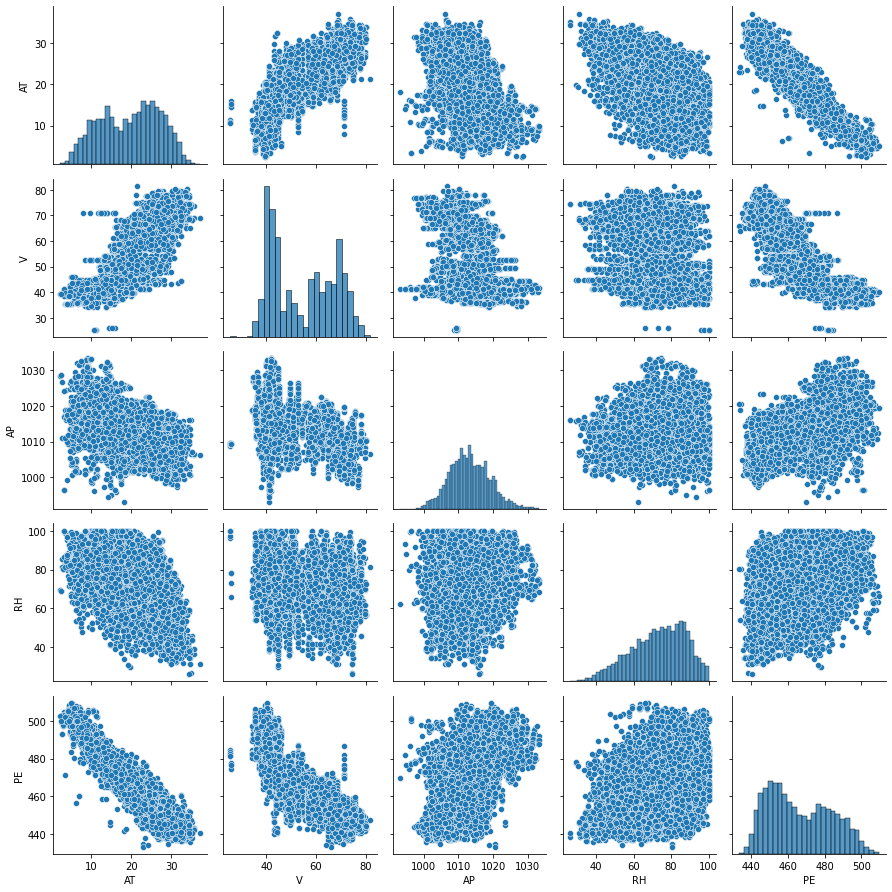

In [ ]:
plt.figure(figsize=(12,6))

sns.pairplot(train_data, diag_kind='hist')

plt.tight_layout()
plt.show()

**Null or missing value check**

In [ ]:
print("Is there a null value in Train data? {}".format(train_data.isnull().sum().any()))
print("Is there a null value in Test data? {}".format(test_data.isnull().sum().any()))

Is there a null value in Train data? False
Is there a null value in Test data? False


**Correlation between attributes**

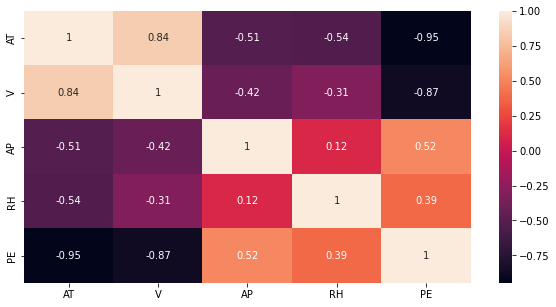

In [ ]:
# Compute correlation between the variables
corr = train_data.corr()


plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Peason correlation calculation
for i in range(train_data.shape[1]-1):
    feature = train_data.columns[i]
    X = train_data[feature].values
    y = train_data['PE']
    r = np.round(pearsonr(X, y),2)
    print(f"Feature PE vs {feature}: r-value : {r}")

Feature PE vs AT: r-value : [-0.95  0.  ]
Feature PE vs V: r-value : [-0.87  0.  ]
Feature PE vs AP: r-value : [0.52 0.  ]
Feature PE vs RH: r-value : [0.39 0.  ]


## 3. Feature Engineering

**Interactive Features by Polynomial function**

In [ ]:
train_data['train_or_test'] = 1
test_data['train_or_test'] = 0

# Combining train and test data
combined_set = pd.concat([train_data, test_data])

feature_cols = ['AT', 'V', 'AP', 'RH']
poly_cols = ['Coff','AT', 'V', 'AP', 'RH', 'AT2', 'AT*V', 'AT*AP', 'AT*RH', 'V2', 'V*AP', 'V*RH', 'AP2', 'AP*RH', 'RH2']
X = combined_set[feature_cols]
# Invoking polynomial feature transform method with degree of 2 for two variables
poly_reg = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly_reg.fit_transform(X)

# Converting array into a Dataframe
X_poly = pd.DataFrame(X_poly, columns=poly_cols, index=combined_set.index)

X_poly['train_or_test'] = combined_set['train_or_test']

In [ ]:
X_poly.head()

,Coff,AT,V,AP,RH,AT2,AT*V,AT*AP,AT*RH,V2,V*AP,V*RH,AP2,AP*RH,RH2,train_or_test
0,1.0,29.07,72.51,1009.24,58.38,845.0649,2107.8657,29338.6068,1697.1066,5257.7001,73179.9924,4233.1338,1.018565e+06,58919.4312,3408.2244,1
1,1.0,32.38,67.17,1006.97,60.04,1048.4644,2174.9646,32605.6886,1944.0952,4511.8089,67638.1749,4032.8868,1.013989e+06,60458.4788,3604.8016,1
2,1.0,19.29,67.71,1007.94,63.71,372.1041,1306.1259,19443.1626,1228.9659,4584.6441,68247.6174,4313.8041,1.015943e+06,64215.8574,4058.9641,1
3,1.0,16.45,41.48,1016.64,45.21,270.6025,682.3460,16723.7280,743.7045,1720.5904,42170.2272,1875.3108,1.033557e+06,45962.2944,2043.9441,1
4,1.0,21.43,46.97,1013.94,61.25,459.2449,1006.5671,21728.7342,1312.5875,2206.1809,47624.7618,2876.9125,1.028074e+06,62103.8250,3751.5625,1


In [ ]:
train_enc, test_enc = X_poly.loc[X_poly['train_or_test'] == 1], X_poly.loc[X_poly['train_or_test'] == 0]

**Split the data into Train and Validation set**

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_enc, train_data['PE'], test_size=0.2, random_state=42)

**Feature Selection using RandomForest Regressor**

In [ ]:
# Random forest regressor model to fit the split data
rnf = RandomForestRegressor(n_estimators=300)

rnf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [ ]:
y_preds = rnf.predict(X_valid)

print("RMSE : {:.3f} ".format(mean_squared_error(y_valid, y_preds, squared=False)))
# print("RMSLE : {np.sqrt(mean_squared_log_error(y_valid, y_preds))}")

RMSE : 2.815 


In [ ]:
X_train.columns

Index(['Coff', 'AT', 'V', 'AP', 'RH', 'AT2', 'AT*V', 'AT*AP', 'AT*RH', 'V2',
       'V*AP', 'V*RH', 'AP2', 'AP*RH', 'RH2', 'train_or_test'],
      dtype='object')

In [ ]:
rnf.feature_importances_

array([0.        , 0.00962778, 0.00409756, 0.00827789, 0.00209421,
       0.011333  , 0.89320303, 0.02626846, 0.01564219, 0.00416951,
       0.0067602 , 0.00521308, 0.00864346, 0.00264097, 0.00202867,
       0.        ])

In [ ]:
imp_features = list(zip(X_train.columns, rnf.feature_importances_))
sorted(imp_features, key=lambda x: x[1], reverse=True)

[('AT*V', 0.8932030337517423),
 ('AT*AP', 0.026268459374237014),
 ('AT*RH', 0.015642191550222433),
 ('AT2', 0.011333000418277783),
 ('AT', 0.009627779920767434),
 ('AP2', 0.008643455975631754),
 ('AP', 0.008277886176608745),
 ('V*AP', 0.006760198528969654),
 ('V*RH', 0.005213076483991168),
 ('V2', 0.004169512353892523),
 ('V', 0.0040975605659032055),
 ('AP*RH', 0.0026409702787465847),
 ('RH', 0.0020942051254810687),
 ('RH2', 0.0020286694955283565),
 ('Coff', 0.0),
 ('train_or_test', 0.0)]

## Target Variable Transformation

The target variable **PE** shows the Bimodel distribution. We need to transform this to uniform distribution to improve the model performance. 

In [ ]:
# Checking the target value skewness
y_target = train_data['PE'].values

y_data = y_target.reshape(len(y_target), 1)

# QuantileTransformer to make bimodel to uniform
quant_trans = QuantileTransformer(n_quantiles=300, output_distribution='uniform')

y_trans = quant_trans.fit_transform(y_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


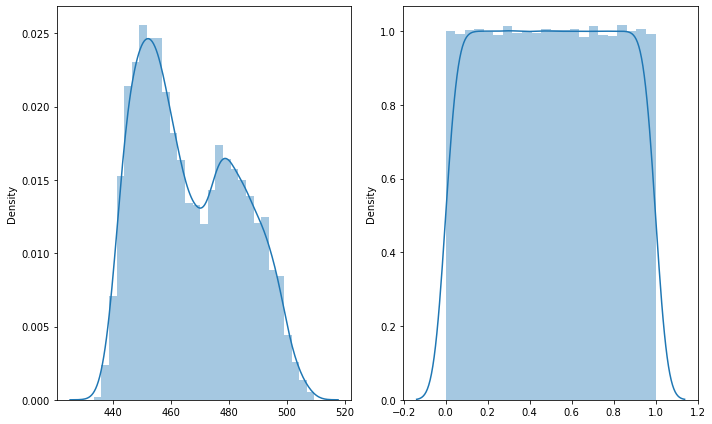

In [ ]:

fig, axes = plt.subplots(1,2,figsize=(10,6))

sns.distplot(y_target, kde=True, ax=axes[0])
sns.distplot(y_trans, kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

## Feature Scaling

In [ ]:
imp_features = ['AT','V', 'AP','AT*V', 'AT*AP', 'AT*RH']
# feature_cols = ['AT', 'AP', 'RH']
X = train_enc[imp_features]
# y = train_enc['y_trans']
y = train_data['PE']
X_test = test_enc[imp_features]

In [ ]:
# StandardScaler to scale the variable values
scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

X_scaled_df = pd.DataFrame(X_scaled, columns=imp_features)

## Model Building

In [ ]:
lgb_params={
    'learning_rate': 0.1,
    'objective':'regression',
    'importance_type':'split',
    'metric':'rmse',
    'num_leaves': 31,
    "random_state":42,
    'max_depth': 8,
    "bagging_seed" : 42,
    "bagging_frequency" : 5,
    "reg_alpha":0.0,
    "reg_lambda":0.0,
    'min_child_samples': 20,
    'min_child_weight':1
}

xgb_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'learning_rate': 0.1,
    'max_depth': 8,
    'min_child_weight': 1
}

In [ ]:
# Boosting algorithms

lgbm = LGBMRegressor(**lgb_params, n_estimators=900)

xgb = XGBRegressor(**xgb_params, n_estimators=700)

In [ ]:
K = 5
kfolds = KFold(n_splits=K, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(kfolds.split(X_scaled_df)):
    
    y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]
    X_train, X_valid = X_scaled_df.iloc[train_idx, :], X_scaled_df.iloc[test_idx, :]
    
    print( "\nFold ", i)
    print("-"* 20 + "LGBM Regression" + "-"* 20)
    lgbm.fit(X_train, y_train, 
             eval_metric='rmse',
             eval_set=[(X_valid,  y_valid)],
            early_stopping_rounds=20,
            verbose=100)
    
    print("-"* 20 + "XGB Regression" + "-"* 20)
    xgb.fit(X_train, y_train, 
             eval_metric='rmse',
             eval_set=[(X_valid, y_valid)],
            early_stopping_rounds=20,
            verbose=100)


Fold  0
--------------------LGBM Regression--------------------
Training until validation scores don't improve for 20 rounds.
[100]	valid_0's rmse: 3.41904
[200]	valid_0's rmse: 3.15758
[300]	valid_0's rmse: 3.01413
[400]	valid_0's rmse: 2.95292
[500]	valid_0's rmse: 2.89632
[600]	valid_0's rmse: 2.85065
[700]	valid_0's rmse: 2.81919
[800]	valid_0's rmse: 2.79494
[900]	valid_0's rmse: 2.77844
Did not meet early stopping. Best iteration is:
[900]	valid_0's rmse: 2.77844
--------------------XGB Regression--------------------
[0]	validation_0-rmse:419.736
Will train until validation_0-rmse hasn't improved in 20 rounds.
[100]	validation_0-rmse:3.13857
[200]	validation_0-rmse:2.77699
[300]	validation_0-rmse:2.66715
[400]	validation_0-rmse:2.60841
Stopping. Best iteration:
[448]	validation_0-rmse:2.59361


Fold  1
--------------------LGBM Regression--------------------
Training until validation scores don't improve for 20 rounds.
[100]	valid_0's rmse: 3.27737
[200]	valid_0's rmse: 3.04515
[

**Predicting Test Data**

In [ ]:
X_test_df = pd.DataFrame(X_test_scaled, columns=imp_features)

# Invoking model predict method
lgb_preds = lgbm.predict(X_test_df)
xgb_preds = xgb.predict(X_test_df)

**Weighted Average Ensemble**

In [ ]:
boost_1, boost_2 = 0.3, 0.7 

preds_1 = boost_1 * lgb_preds
preds_2 = boost_2 * xgb_preds

predictions = preds_1 + preds_2

In [ ]:
predictions

array([471.04520932, 494.90505338, 496.94957111, ..., 471.32317883,
       444.38732012, 465.39734275])

## Final Submission

In [ ]:
final_df = pd.DataFrame(np.round(predictions, 6), columns=['PE'])

final_df.to_csv('powerplant_linear_01.csv', index=False)

## Conclusion

One of the primary observations on the dataset was that the dataset had only numerical variables and there are variables which directly involve in calculation of Energy output(PE). 

The estimation of Electrical Energy output (PE) is dependent on all the given factors(variables). This involves certain scientific methods and formula to obtain PE value. That is one of the key aspects to be considered in the feature engineering. We should include the required feature, which can be derived from the existing features. 

### Learnings:
1. We should check the domain objective of the Target variable data. In this case, PE can be calculated with the given feature data and derived data.
2. Is there a way we can derive a new feature. For ex, Dew Point is one of the critical feature for estimating PE.
3. Interactive features play a major role in reducing bias.
4. Bimodel distribution of data can be transformed to uniform or normal distribution using Quantile transformation.

The final score of this submission are as follows, 

Private score : **2.45**

Public Score: **2.51**

![13#MachineHack.png](attachment:13#MachineHack.png)